<a href="https://colab.research.google.com/github/MateusGilbert/topicos_SD/blob/main/proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy nltk matplotlib pdfplumber sklearn pdf2image pytesseract Image gensim
!apt install tesseract-ocr tesseract-ocr-por poppler-utils

     |████████████████████████████████| 51kB 1.5MB/s 
     |████████████████████████████████| 5.6MB 3.7MB/s 
     |████████████████████████████████| 143kB 38.5MB/s 
     |████████████████████████████████| 13.7MB 294kB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.5.24-cp36-none-any.whl size=31125 sha256=dc98a75e3895e9cf7a6a341f7c6ed0295c1b3653fa049982a11821b06b443080
  Stored in directory: /root/.cache/pip/wheels/42/e7/9d/783e40e447a240ace74b520158a133175853f3c3b2999f4520
  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=e0da38a8cbd7e4e8d869d7b7d67f37d85f4d6a9d6634a504b2a0c06a38f619c3
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pdfplumber pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The followin

In [ ]:
from google.colab import files
files.upload()

Saving artigo_vRevisada.pdf to artigo_vRevisada.pdf
Saving ABNT NBR 6023-2002 Referencias Bibliograficas.pdf to ABNT NBR 6023-2002 Referencias Bibliograficas.pdf


{'ABNT NBR 6023-2002 Referencias Bibliograficas.pdf': b'%PDF-1.3\r%\xe2\xe3\xcf\xd3\r\n178 0 obj\r<< \r/Linearized 1 \r/O 182 \r/H [ 1551 877 ] \r/L 524522 \r/E 195875 \r/N 24 \r/T 520843 \r>> \rendobj\r                                                    xref\r178 42 \r0000000016 00000 n\r\n0000001209 00000 n\r\n0000001330 00000 n\r\n0000001470 00000 n\r\n0000002428 00000 n\r\n0000002685 00000 n\r\n0000002716 00000 n\r\n0000002902 00000 n\r\n0000003165 00000 n\r\n0000003187 00000 n\r\n0000003296 00000 n\r\n0000004646 00000 n\r\n0000004835 00000 n\r\n0000005016 00000 n\r\n0000005223 00000 n\r\n0000006087 00000 n\r\n0000006110 00000 n\r\n0000007597 00000 n\r\n0000007620 00000 n\r\n0000008801 00000 n\r\n0000009610 00000 n\r\n0000009824 00000 n\r\n0000009847 00000 n\r\n0000010948 00000 n\r\n0000010971 00000 n\r\n0000012150 00000 n\r\n0000012173 00000 n\r\n0000013630 00000 n\r\n0000013653 00000 n\r\n0000015040 00000 n\r\n0000015063 00000 n\r\n0000016390 00000 n\r\n0000139265 00000 n\r\n0000

In [ ]:
#incializando funções

from pdf2image import convert_from_path as cPdf2img
import pdfplumber
from PIL import Image
from pytesseract import image_to_string as img2str
import re

#################################################
page_id = '-'*100+'\nPage {}\n'+'-'*100+'\n'

#regex expressions
regexes = [
  [r'(\n)([a-z]|-)', r'\2'],
  [r'(\s+)(\.|,|;)', r'\2'],
  [r'\s+', r' ']
]
##################################################

#usando pdfplumber
def usePdfplumber(filename, verbose=True):
  if verbose:
    print('Converting "{}" using pdfplumber'.format(filename))
  fd = open(filename[:-4] + '_pplumber.txt', 'w')
  i = 0
  with pdfplumber.open(filename) as pdf:
    n_pages = len(pdf.pages)
    for page,i in zip(pdf.pages,range(n_pages)):
      print("Converting page #{}".format(i+1))
      text = page.extract_text()
      for rPattern,subString in regexes:
        text = re.sub(rPattern,subString,text)
      fd.write(page_id.format(i+1))
      fd.write(text + '\n')
  fd.close()

#usando pytesseract
def usePytesseract(filename, verbose=True):
  if verbose:
    print('Converting "{}" using pytesseract'.format(filename))
  fd = open(filename[:-4] + '_ptesseract.txt', 'w')
  pages =cPdf2img(filename)
  for i,page in enumerate(pages):
    print("Converting page #{}".format(i+1))
    text = img2str(page, lang='por')
    for rPattern,subString in regexes:
        text = re.sub(rPattern,subString,text)
    fd.write(page_id.format(i+1))
    fd.write(text + '\n')
  fd.close()

In [ ]:
import os

files = [filename for filename in os.listdir() if filename[-3:] == 'pdf']

for filename in files:
  usePdfplumber(filename)
  usePytesseract(filename)

Converting "ABNT NBR 6023-2002 Referencias Bibliograficas.pdf" using pdfplumber
Converting page #1
Converting page #2
Converting page #3
Converting page #4
Converting page #5
Converting page #6
Converting page #7
Converting page #8
Converting page #9
Converting page #10
Converting page #11
Converting page #12
Converting page #13
Converting page #14
Converting page #15
Converting page #16
Converting page #17
Converting page #18
Converting page #19
Converting page #20
Converting page #21
Converting page #22
Converting page #23
Converting page #24
Converting "ABNT NBR 6023-2002 Referencias Bibliograficas.pdf" using pytesseract
Converting page #1
Converting page #2
Converting page #3
Converting page #4
Converting page #5
Converting page #6
Converting page #7
Converting page #8
Converting page #9
Converting page #10
Converting page #11
Converting page #12
Converting page #13
Converting page #14
Converting page #15
Converting page #16
Converting page #17
Converting page #18
Converting page #

In [ ]:
files = [filename for filename in os.listdir() if filename[-3:] == 'txt']
f_pplumber = [filename for filename in files if re.match('.+_pplumber\.txt',filename)]
f_ptesseract = [filename for filename in files if re.match('.+_ptesseract\.txt',filename)]

print('Pdf Plumber files\n\t{}'.format(f_pplumber))
print('Py Tesseract files\n\t{}'.format(f_ptesseract))

Pdf Plumber files
	['ABNT NBR 6023-2002 Referencias Bibliograficas_pplumber.txt', 'artigo_vRevisada_pplumber.txt']
Py Tesseract files
	['ABNT NBR 6023-2002 Referencias Bibliograficas_ptesseract.txt', 'artigo_vRevisada_ptesseract.txt']


In [ ]:
#tokenizers

#word tokenization
def w_tokenize(filename):
  fd = open(filename,'r')
  text = None
  for line in fd:
    if not re.search('-{2,}',line) and not re.match('Page\ [0-9]+$',line):
      if text:
        text += line
      else:
        text = line
  fd.close()
  return text.split()

#sentence builder
def build_sents(t_text):
  text_sent = []; sentence = []
  for w in t_text:
    sentence.append(w)
    if w[-1] == '.':
      sentence = ' '.join(sentence)
      text_sent.append(sentence)
      sentence = []
  return text_sent

In [ ]:
#puxei o word ninja para fora (arranjar uma forma de alterar quando importar)

import gzip, os, re
from math import log


__version__ = '2.0.0'


# I did not author this code, only tweaked it from:
# http://stackoverflow.com/a/11642687/2449774
# Thanks Generic Human!


# Modifications by Scott Randal (Genesys)
#
# 1. Preserve original character case after splitting
# 2. Avoid splitting every post-digit character in a mixed string (e.g. 'win32intel')
# 3. Avoid splitting digit sequences
# 4. Handle input containing apostrophes (for possessives and contractions)
#
# Wordlist changes:
# Change 2 required adding single digits to the wordlist
# Change 4 required the following wordlist additions:
#   's
#   '
#   <list of contractions>


class LanguageModel(object):
  def __init__(self, word_file):
    # Build a cost dictionary, assuming Zipf's law and cost = -math.log(probability).
    with gzip.open(word_file) as f:
      words = f.read().decode().split()
    self._wordcost = dict((k, log((i+1)*log(len(words)))) for i,k in enumerate(words))
    self._maxword = max(len(x) for x in words)
   

  def split(self, s):
    """Uses dynamic programming to infer the location of spaces in a string without spaces."""
    l = [self._split(x) for x in _SPLIT_RE.split(s)]
    return [item for sublist in l for item in sublist]


  def _split(self, s):
    # Find the best match for the i first characters, assuming cost has
    # been built for the i-1 first characters.
    # Returns a pair (match_cost, match_length).
    def best_match(i):
      candidates = enumerate(reversed(cost[max(0, i-self._maxword):i]))
      return min((c + self._wordcost.get(s[i-k-1:i].lower(), 9e999), k+1) for k,c in candidates)

    # Build the cost array.
    cost = [0]
    for i in range(1,len(s)+1):
      c,k = best_match(i)
      cost.append(c)

    # Backtrack to recover the minimal-cost string.
    out = []
    i = len(s)
    while i>0:
      c,k = best_match(i)
      assert c == cost[i]
      # Apostrophe and digit handling (added by Genesys)
      newToken = True
      if not s[i-k:i] == "'": # ignore a lone apostrophe
        if len(out) > 0:
          # re-attach split 's and split digits
          if out[-1] == "'s" or (s[i-1].isdigit() and out[-1][0].isdigit()): # digit followed by digit
            out[-1] = s[i-k:i] + out[-1] # combine current token with previous token
            newToken = False
      # (End of Genesys addition)

      if newToken:
        out.append(s[i-k:i])

      i -= k

    return reversed(out)

#DEFAULT_LANGUAGE_MODEL = LanguageModel(os.path.join(os.path.dirname(os.path.abspath(__file__)),'wordninja','wordninja_words.txt.gz'))
_SPLIT_RE = re.compile("[^a-zA-Z0-9ãõÁáÍíÉéÓóÊêÔôÇçÍíÚúÛû\-']+")

def split(s):
  return DEFAULT_LANGUAGE_MODEL.split(s)

In [ ]:
#text scraping basics

import requests
from bs4 import BeautifulSoup
from nltk import FreqDist as fdist
import nltk
nltk.download('stopwords')

urls = ['https://pt.wikipedia.org/wiki/Batalha_da_Pra%C3%A7a_da_S%C3%A9',
        'https://pt.wikipedia.org/wiki/Nascimento_de_caix%C3%A3o',
        'https://pt.wikipedia.org/wiki/Albert_Einstein',
        'https://pt.wikipedia.org/wiki/Anticiclone_do_Atl%C3%A2ntico_Sul',
        'https://pt.wikipedia.org/wiki/Margem_de_erro'
        'https://pt.wikipedia.org/wiki/Eg%C3%ADpcios_dos_Balc%C3%A3s',
        'https://pt.wikipedia.org/wiki/J%C3%BAlio_C%C3%A9sar',
        'https://pt.wikipedia.org/wiki/Che_Guevara',
        'https://pt.wikipedia.org/wiki/Abraham_Lincoln'
        'https://pt.wikipedia.org/wiki/Margaret_Thatcher',
        'https://pt.wikipedia.org/wiki/Aston_Villa_Football_Club',
        'https://pt.wikipedia.org/wiki/Trof%C3%A9u_da_Copa_do_Mundo_FIFA',
        'https://pt.wikipedia.org/wiki/Pol%C3%ADtica_de_contrata%C3%A7%C3%A3o_do_The_Rangers_Football_Club',
        'https://pt.wikipedia.org/wiki/Arduino',
        'https://pt.wikipedia.org/wiki/Motor_de_jogo',
        'https://pt.wikipedia.org/wiki/Wikip%C3%A9dia',
        'https://pt.wikipedia.org/wiki/Nota%C3%A7%C3%A3o_cient%C3%ADfica',
        'https://pt.wikipedia.org/wiki/Orqu%C3%ADdea',
        'https://pt.wikipedia.org/wiki/Corrida_A%C3%A9rea_de_Londres_para_Manchester_de_1910',
        'https://pt.wikipedia.org/wiki/Sarc%C3%B3fago_de_Hagia_Triada',
        'https://pt.wikipedia.org/wiki/Nebulosa_do_Caranguejo',
        'https://pt.wikipedia.org/wiki/Arauc%C3%A1ria',
        'https://pt.wikipedia.org/wiki/Batata',
        'https://pt.wikipedia.org/wiki/Fungi',
        'https://pt.wikipedia.org/wiki/Amplitude_interquartil',
        'https://pt.wikipedia.org/wiki/Lei_dos_grandes_n%C3%BAmeros',
        'https://pt.wikipedia.org/wiki/Movimento_pela_Extin%C3%A7%C3%A3o_Humana_Volunt%C3%A1ria',
        'https://pt.wikipedia.org/wiki/Google',
        'https://pt.wikipedia.org/wiki/White_Star_Line',
        'https://pt.wikipedia.org/wiki/Venda_de_esposas_na_Inglaterra',
        'https://pt.wikipedia.org/wiki/Diego_Maradona',
        'https://pt.wikipedia.org/wiki/Johan_Cruijff',
        'https://pt.wikipedia.org/wiki/Declara%C3%A7%C3%A3o_de_Independ%C3%AAncia_da_Litu%C3%A2nia',
        'https://pt.wikipedia.org/wiki/Acidente_nuclear_de_Chernobil',
        'https://pt.wikipedia.org/wiki/Opera%C3%A7%C3%A3o_Barbarossa',
        'https://pt.wikipedia.org/wiki/Batalha_de_Tuiuti',
        'https://pt.wikipedia.org/wiki/Machado_de_Assis',
        'https://pt.wikipedia.org/wiki/Caso_Taman_Shud',
        'https://pt.wikipedia.org/wiki/Constitui%C3%A7%C3%A3o_do_Imp%C3%A9rio_Romano',
        'https://pt.wikipedia.org/wiki/Elei%C3%A7%C3%A3o_especial_para_presidente_da_C%C3%A2mara_dos_Deputados_do_Brasil_em_2016',
        'https://pt.wikipedia.org/wiki/Brasil',
        'https://pt.wikipedia.org/wiki/Academicismo',
        'https://pt.wikipedia.org/wiki/Academismo_no_Brasil',
        'https://pt.wikipedia.org/wiki/Universidade_Federal_do_Rio_de_Janeiro',
        'https://pt.wikipedia.org/wiki/Lua',
        'https://pt.wikipedia.org/wiki/J%C3%BApiter_(planeta)',
        'https://pt.wikipedia.org/wiki/Hist%C3%B3ria_da_biologia',
        'https://pt.wikipedia.org/wiki/Decl%C3%ADnio_contempor%C3%A2neo_da_biodiversidade_mundial',
        'https://pt.wikipedia.org/wiki/Opera',
        'https://pt.wikipedia.org/wiki/Vermelho',
        'https://pt.wikipedia.org/wiki/F%C3%ADsica',
        'https://pt.wikipedia.org/wiki/Aquecimento_global',
        'https://pt.wikipedia.org/wiki/Mar',
        'https://pt.wikipedia.org/wiki/Olho_(ciclone)',
        'https://pt.wikipedia.org/wiki/Crise_da_abdica%C3%A7%C3%A3o_de_Eduardo_VIII',
        'https://pt.wikipedia.org/wiki/Parlamento_Europeu',
        'https://pt.wikipedia.org/wiki/Compagnie_G%C3%A9n%C3%A9rale_Transatlantique',
        'https://pt.wikipedia.org/wiki/Oliver_Typewriter_Company',
        'https://pt.wikipedia.org/wiki/P%C3%A2nico_financeiro_de_1907',
        'https://pt.wikipedia.org/wiki/Harvey_Milk',
        'https://pt.wikipedia.org/wiki/Barack_Obama',
        'https://pt.wikipedia.org/wiki/Ambientalismo',
        'https://pt.wikipedia.org/wiki/Brian_Clough',
        'https://pt.wikipedia.org/wiki/Ant%C3%A1rtida',
        'https://pt.wikipedia.org/wiki/Fran%C3%A7a',
        'https://pt.wikipedia.org/wiki/Ilhas_Malvinas',
        'https://pt.wikipedia.org/wiki/Bilbau',
        'https://pt.wikipedia.org/wiki/Londres',
        'https://pt.wikipedia.org/wiki/Pedra_de_Roseta',
        'https://pt.wikipedia.org/wiki/Edward_Smith',
        'https://pt.wikipedia.org/wiki/Ulysses_(poema)',
        'https://pt.wikipedia.org/wiki/L%C3%ADnguas_maias',
        'https://pt.wikipedia.org/wiki/Hist%C3%B3ria_dos_conceitos',
        'https://pt.wikipedia.org/wiki/Hamlet',
        'https://pt.wikipedia.org/wiki/Vantagem_do_primeiro_movimento_no_xadrez',
        'https://pt.wikipedia.org/wiki/Sistema_de_coordenadas_cartesiano'
        'http://www.gutenberg.org/cache/epub/34387/pg34387.txt',                  #história de portugal
        'http://www.gutenberg.org/cache/epub/55752/pg55752.txt',                  #Dom Casmurro
        'http://www.gutenberg.org/cache/epub/54829/pg54829.txt',                  #Memórias póstumas Braz...
        'http://www.gutenberg.org/cache/epub/3333/pg3333.txt',                    #Os Lusíadas
        'http://www.gutenberg.org/cache/epub/31509/pg31509.txt',                  #obras completas camões
        'http://www.gutenberg.org/cache/epub/55682/pg55682.txt',                  #quincas borba
        'https://www.gutenberg.org/files/15047/15047-0.txt',                      #bases da ortografia portuguesa
        'http://www.gutenberg.org/cache/epub/25641/pg25641.txt',                  #cartas de inglaterra
        'https://www.gutenberg.org/ebooks/42942',                                 #primo basilio
        'http://www.gutenberg.org/cache/epub/33056/pg33056.txt',                  #história sem data
        'https://www.gutenberg.org/files/61653/61653-0.txt',                      #poesias completas machado
        'https://epocanegocios.globo.com/Empresa/noticia/2020/10/stf-mantem-extradicao-de-ex-socio-da-telexfree-para-os-estados-unidos.html',
        'https://g1.globo.com/rj/rio-de-janeiro/noticia/2020/10/20/witzel-usa-trechos-iguais-ao-da-wikipedia-em-defesa-entregue-a-tribunal-que-julga-impeachment.ghtml',
        'https://g1.globo.com/economia/noticia/2020/10/20/acordo-preve-credito-de-us-1-bilhao-dos-eua-para-financiar-projetos-no-brasil-incluindo-5g.ghtml',
        'https://globoesporte.globo.com/futebol/futebol-internacional/liga-dos-campeoes/jogo/20-10-2020/barcelona-ferencvarosi.ghtml',
        'https://noticias.uol.com.br/politica/ultimas-noticias/2020/10/20/alexandre-de-moraes-e-novo-relator-do-inquerito-contra-bolsonaro-no-stf.htm',
        'https://www.uol.com.br/esporte/futebol/ultimas-noticias/2020/10/20/diego-explica-golaco-contra-o-corinthians-e-diz-que-filipe-luis-e-nojento.htm',
        'https://noticias.uol.com.br/politica/ultimas-noticias/2020/10/20/tse-determina-divulgacao-na-internet-de-extratos-bancarios-dos-partidos.htm',
        'https://www.uol.com.br/splash/noticias/ooops/2020/10/20/globo-fecha-patrocinio-milionario-de-3-anos-para-novela-das-9.htm',
        'https://www.uol.com.br/esporte/futebol/ultimas-noticias/2020/10/20/vice-do-atletico-mg-confirma-1-mes-de-atraso-salarial-mas-projeta-quitacao.htm',
        'https://rollingstone.uol.com.br/noticia/por-que-winona-ryder-teve-medo-de-trabalhar-com-johnny-depp-em-edward-maos-de-tesoura/',
        'https://noticias.uol.com.br/ultimas-noticias/efe/2020/10/20/reino-unido-registra-maior-numero-de-mortes-por-covid-19-desde-junho.htm',
        'https://economia.uol.com.br/cotacoes/noticias/redacao/2020/10/20/fechamento-dolar-ibovespa-20-outubro.htm',
        'https://globoesporte.globo.com/futebol/futebol-internacional/noticia/cristiano-ronaldo-depende-de-teste-nesta-quarta-para-ser-liberado-para-reencontro-com-messi-na-champions.ghtml',
        'https://g1.globo.com/mundo/eleicoes-nos-eua/2020/noticia/2020/10/21/apos-manter-se-discreto-obama-estreara-em-campanha-de-biden-a-casa-branca.ghtml',
        'https://epocanegocios.globo.com/Brasil/noticia/2020/10/coronavirus-na-contramao-do-mundo-brasil-segue-sem-restricoes-entrada-de-estrangeiros-por-aeroportos.html',
        'https://www.techtudo.com.br/noticias/2020/10/iphone-12-vendeu-o-dobro-do-iphone-11-na-fase-de-encomenda-diz-analista.ghtml',
        'https://www.uol.com.br/esporte/futebol/colunas/marcel-rizzo/2020/10/21/o-guru-de-miguel-ramirez-que-fez-o-tecnico-dizer-nao-ao-palmeiras-agora.htm',
        'https://noticias.uol.com.br/cotidiano/ultimas-noticias/2020/10/20/promotor-suborno-desembargador-rio-de-janeiro.htm',
        'https://www.uol.com.br/esporte/ultimas-noticias/2020/10/20/discordancia-de-caio-e-cleber-e-mais-uma-ao-vivo-da-dupla-relembre-outras.htm',
        'https://www.uol.com.br/esporte/futebol/ultimas-noticias/2020/10/21/pai-de-pele-foi-a-aconselhado-a-encaminha-lo-a-concurso-no-banco-do-brasil.htm',
        'https://noticias.uol.com.br/cotidiano/ultimas-noticias/2020/10/21/pf-faz-operacao-para-apurar-suspeita-de-fraudes-em-licitacoes-da-infraero.htm',
        'https://noticias.uol.com.br/eleicoes/2020/10/20/motorista-de-primeira-dama-de-curitiba-morre-de-covid-19-casal-teve-doenca.htm',
        'https://noticias.uol.com.br/politica/ultimas-noticias/2020/10/20/justica-decreta-indisponibilidade-dos-bens-de-eduardo-paes.htm',

]

text_col = 'bons_textos_div_wiki.txt'
dic_name = 'pseudo_dic.txt'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#scraper para inicializar o dicionário
#searching tags
#t_list = ['h1', 'h2', 'h3', 'p', 'a', 'ul', 'span', 'input']
t_list = ['p', 'pre']

with open(text_col, 'w', encoding='utf-8') as outfile:
  for url in urls:
    website = requests.get(url)
    soup = BeautifulSoup(website.content, 'lxml')
    tags = soup.find_all(t_list)
    text = [' '.join(s.findAll(text=True)) for s in tags]
    text_len = len(text)
    for item in text:
      print(item,file=outfile)

with open(dic_name,'w') as outfile:
  words = w_tokenize(text_col) + nltk.corpus.stopwords.words('portuguese') + ['autenticação', 'executa', 'fisicamente', 'ortogonalmente'] + 10*['Brasil', 'Brasília']
  words = [re.sub(r'^(\W+)?(\w+)(\W+)?',r'\2',w) if re.match('^(\W+)\w+(\W+)?',w) else w for w in words]
  words = [w for w in words if len(w) > 2 or w in nltk.corpus.stopwords.words('portuguese')]
  w_freq = fdist(words)
  for w,f in w_freq.most_common():
    print(w,file=outfile)

dict_words = words

In [ ]:
!gzip -f pseudo_dic.txt
!ls

'ABNT NBR 6023-2002 Referencias Bibliograficas.pdf'
'ABNT NBR 6023-2002 Referencias Bibliograficas_pplumber.txt'
'ABNT NBR 6023-2002 Referencias Bibliograficas_ptesseract.txt'
 artigo_vRevisada.pdf
 artigo_vRevisada_pplumber.txt
 artigo_vRevisada_ptesseract.txt
 bons_textos_div_wiki.txt
 pseudo_dic.txt.gz
 sample_data


In [ ]:
lm = LanguageModel('pseudo_dic.txt.gz')

def filt_sentences(sentences,dictionary=dict_words):
  filt_sent = []
  for sentence in sentences:
    d_words = [w for w in sentence.split(' ') if w.lower() in dictionary]
    if len(d_words)/len(sentence.split(' ')) >= .5 and len(d_words) > 1:
      filt_sent.append(sentence)
  return filt_sent

pp_tokens = []
pt_tokens = []
sentences = []
raw_sentences = []
for filename in f_pplumber:
  pp_tokens.append((filename[:-4],w_tokenize(filename)))
for filename in f_ptesseract:
  pt_tokens.append((filename[:-4],w_tokenize(filename)))
for t_name,tokens in pt_tokens:
  raw_sents = build_sents(tokens)
  aux_sent = filt_sentences(raw_sents)
  raw_sentences.append((t_name, aux_sent))
  n_tokens = []
  for sentence in aux_sent:
    for t in sentence.split(' '):
      punctuation = None
      if not (t[-1].isalpha() or t[-1].isdigit()):
        punctuation = t[-1]
      aux = lm.split(t)
      for i,val in enumerate(aux):
        if (i+1 == len(aux)) and punctuation:
          n_tokens.append(val + punctuation)
        else:
          n_tokens.append(val)
  sentences.append((t_name,build_sents(n_tokens)))
#for name,tokens in pp_tokens, pt_tokens, sentences:
 # print(name); print(tokens)

In [ ]:
#words statistics
from nltk import FreqDist as fdist
import nltk
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import argsort, average
from gensim.models import TfidfModel
from gensim import corpora
from pprint import pprint
import numpy as np

#stop words
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

#this "normalizes" if-idf
def init_ifidf_ref():
  with open(text_col,'r') as infile:
    text = None
    for line in infile:
      if not line == '\n':
        if text:
          text += line
        else:
          text = line
  return text.split()

#defining lexical diversity function
def lex_diversity(text):
  return len(set(text))/len(text)

#rate sentences
def raw_imp_sent(text_sent, freqs):
  imp_sents = defaultdict(int)
  for sentence in text_sent:
    sent_w = [re.sub(r'^(\W+)?(\w+)(\W+)?',r'\2',w) if re.match('^(\W+)\w+(\W+)?',w) else w for w in sentence]
    for w in sent_w:
      if w in freqs:
        imp_sents[sentence] += freqs[w]
  return sorted(imp_sents.items(), key=lambda x: x[1], reverse=True)

#tf-idf   ajeitar para ele usar os textos
def tfidf_imp_sent(text_sent):
  processed_corpus = [[word for word in document.lower().split() if word not in stopwords] for document in text_sent]
  dictionary = corpora.Dictionary(processed_corpus)
  BoW_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
  vectorizer = TfidfVectorizer()
  tfidf = TfidfModel(BoW_corpus, smartirs='ntc')
  imp_sents = defaultdict(int)
  for doc,sent in zip(tfidf[BoW_corpus],text_sent):
    for id,freq in doc:
      imp_sents[sent] += freq
  return sorted(imp_sents.items(), key=lambda x: x[1], reverse=True)

#get file statistics
def get_statistics(filename,w_tokens,s_tokens, raw_s_tokes=None):
  ld = lex_diversity(w_tokens)
  rel_words = [w.lower() for w in w_tokens if w.lower() not in stopwords]
  rw_freqs = fdist(rel_words)
  r_imp_sents = raw_imp_sent(s_tokens,rw_freqs)
  tdidf_imp_sents = tfidf_imp_sent(s_tokens)
  if raw_s_tokes:
    raw_r_imp_sents = raw_imp_sent(raw_s_tokens, rw_freqs)
    raw_tdidf_imp_sents = tfidf_imp_sent(raw_s_tokens)
    return (filename,ld,rw_freqs,r_imp_sents,tdidf_imp_sents, raw_r_imp_sents, raw_tdidf_imp_sents)
  return (filename,ld,rw_freqs,r_imp_sents,tdidf_imp_sents)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


----------------------------------------------------------------------------------------------------
Estatísticas do arquivo "ABNT NBR 6023-2002 Referencias Bibliograficas":
----------------------------------------------------------------------------------------------------
Diversidade Lexical: 0.40426880811496196
As 50 palavras relevantes mais comuns:
	[('p.', 76), ('elementos', 73), ('ver', 56), ('paulo:', 52), ('documento', 49), ('exemplos:', 47), ('meio', 42), ('rio', 41), ('paulo,', 38), ('ed.', 37), ('1', 35), ('exemplo:', 35), ('em:', 35), ('n.', 34), ('1998.', 33), ('nbr', 31), ('referências', 31), ('v.', 31), ('ser', 30), ('brasil.', 28), ('-', 24), ('essenciais', 24), ('devem', 23), ('1994.', 23), ('acesso', 23), ('essenciais,', 22), ('título', 22), ('complementares,', 22), ('eletrônico', 22), ('referência', 21), ('documento.', 21), ('f.', 21), ('janeiro:', 21), ('inclui', 20), ('complementares', 20), ('in:', 20), ('6023:2002', 19), ('1997.', 18), ('m.', 18), ('disponível', 1

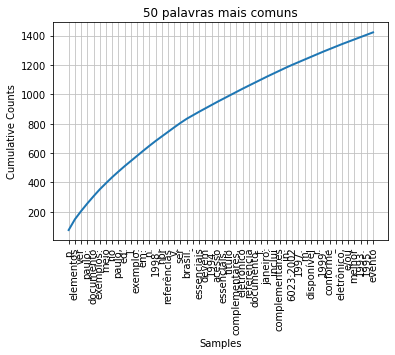

As 5 frases mais importantes (baseado na frequência -- tratado):
	(#000): "Treze de Maio, 13 -- 28 andar C E P 20003 - 900 -- Caixa Postal 1680 Rio de Janeiro -- R J Te l: P A B X 21) 3974 - 2300 F a x: 21) 2240 - 8249 2220 - 6436 Endereço eletrônico w w w a b n t o r g b r Origem: Projeto N B R 6023 2002 A B N T C B - 14 -- Comitê Brasileiro de Finanças, Bancos, Seguros, Comércio, Administração e Documentação C E - 14 001 01 -- Comissão de Estudo de Documentação N B R 6023 -- Information and do cume n t a t i o n -- References -- Deve l o p m e n t De script o r s: References."
	(#001): "N B R 6032 1989 -- Abreviação de títulos de periódicos e publicações seria das -- Procedimento N B R 10520 2002 -- Informação e documentação -- Citações em documentos -- Apresentação N B R 10522 1988 -- Abreviação na descrição b i b l i o g r á f i c a -- Procedimento CÓDIGO de Cata log ação Anglo - A m e r i c a n o."
	(#002): "Quando se tratar de obras consultadas online, proceder - s e - á conforme

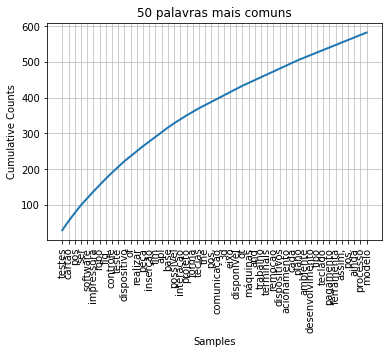

As 5 frases mais importantes (baseado na frequência -- tratado):
	(#000): "Disponível em h t t p s w w w em v c o com w p - c o n t e n t uploads do cume n t s A - G u i d e - t o - E M V - C h i p -- Te c h n o l o g y - v 3 0 - 1 p d f, Acesso em 27 Fevereiro 2018."
	(#001): "O acesso etapa de autenticação do P I N é limitado de forma que para fazê-lo é necessário realizar uma chamada a uma função disponibilizada pela fabricante do P O S que executa a captura do P I N pelo teclado do dispositivo e já realiza o processo de autenticação com o chip do cartão."
	(#002): "Para permitir preencher as lacunas de um teste totalmente automatizado, foi desenvolvido um robô capaz interagir fisicamente com os teclados de terminais P O S e realizar inserção e remoção de cartões utilizando a tua dores, bem como outros tipos de interações de usuário com aplicações do terminal."
	(#003): "Numa transação chip - a n d -- P I N, a autenticação é feita por meio de um identifica dor de 4 o u 6 dígitos P I

In [ ]:
results = []
s_tokens = raw_s_tokens = None
for filename, w_tokens in pp_tokens:
  filename = filename[:-len('_pplumber')]     #criar uma variavel q guarda esse label
  for name, sentence in sentences:
    name = name[:-len('_ptesseract')]
    if filename == name:
      s_tokens = sentence
      break
  if not s_tokens:
    print('An error occurred!!!!')
    break
  for name, sentence in raw_sentences:
    name = name[:-len('_ptesseract')]
    if filename == name:
      raw_s_tokens = sentence
      break
  if not raw_s_tokens:
    print('An error occurred!!!!')
    break
  results.append(get_statistics(filename,w_tokens,s_tokens,raw_s_tokens))

t_most = 50
t_sent = 5

for filename,ld,rw_freqs,r_imp,tfidf_imp,raw_r_imp,raw_tfidf_imp in results:  
  print('-'*100)
  print('Estatísticas do arquivo "{}":'.format(filename))
  print('-'*100)
  print('Diversidade Lexical: {}'.format(ld))
  print('As {} palavras relevantes mais comuns:\n\t{}'.format(t_most,rw_freqs.most_common(t_most)))
  rw_freqs.plot(t_most,cumulative=True,title='{} palavras mais comuns'.format(t_most))
  
  print('As {} frases mais importantes (baseado na frequência -- tratado):'.format(t_sent))
  for i,(s,val) in enumerate(r_imp[:t_sent]):
    print('\t(#{:03d}): "{}"'.format(i,s))
  print('As {} frases mais importantes (baseado no tf-idf -- tratado):'.format(t_sent))
  for i,s in enumerate(tfidf_imp[:t_sent]):
    print('\t(#{:03d}): "{}"'.format(i,s[0]))
  print('As {} frases mais importantes (baseado na frequência -- não tratado):'.format(t_sent))
  for i,(s,val) in enumerate(raw_r_imp[:t_sent]):
    print('\t(#{:03d}): "{}"'.format(i,s))
  print('As {} frases mais importantes (baseado no tf-idf -- não tratado):'.format(t_sent))
  for i,s in enumerate(raw_tfidf_imp[:t_sent]):
    print('\t(#{:03d}): "{}"'.format(i,s[0]))
  print('-'*100)